In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run lib.ipynb
%matplotlib inline

In [2]:
def fric(v, gamma=0.1, mu=0.2):
    norma = sqrt(v[0]**2+v[1]**2)
    if norma <= 1:
        f_x = gamma*v[0]
        f_y = gamma*v[1]
    else:
        f_x = mu*norma**(1.5)*np.sign(v[0])
        f_y = mu*norma**(1.5)*np.sign(v[1])
    return array([f_x,f_y])
def ec_mov(r_v, t, k = 1.0, m = 1.0, q = 1.0, fric=0.0):
    """
    r_v contiene r, theta, r punto, theta punto
    ecuacion de movimiento con gravedad radial
    """
    x,y   = r_v[0:2]
    dx,dy = r_v[2:4]    
    r  = sqrt(r_v[0]**2+r_v[1]**2)
    if fric == 0.0:
        dvx = x*( q*q/r**3 -(k/m) )
        dvy = y*( q*q/r**3 -(k/m) )
    else:
        ff = fric([dx, dy])
        dvx = x*( q*q/r**3 -(k/m) ) -ff[0]
        dvy = y*( q*q/r**3 -(k/m) ) -ff[1]  
    return array([dx,dy,dvx,dvy])

In [19]:
p,h = [1,0,1,1],0.01
t = [0,50]
t,sol= int_rk4(ec_mov, p, t, h, fric=0.0)

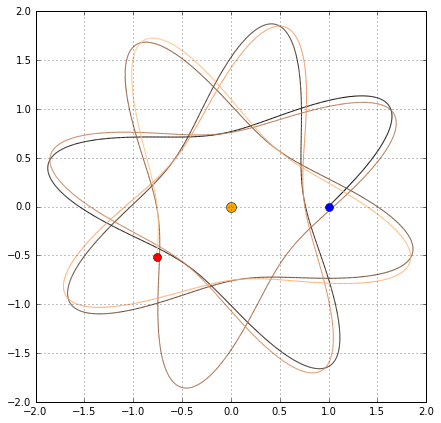

In [21]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.grid(True)

# particula
colorline(sol[:,0], sol[:,1],cmap='copper', linewidth=1);
ax.plot(sol[ 0,0],sol[ 0,1],'o-',c="b",ms=8,alpha=1.0)
ax.plot(sol[-1,0],sol[-1,1],'o-',c="r",ms=8,alpha=1.0)

# carga central
ax.plot(0.0,0.0,'o-',c="orange",ms=10,alpha=1.0)